In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.grid"] = False
# style.use('fivethirtyeight')
# sns.set(style='whitegrid',color_codes=True)
                 
import os   
    
import numpy as np 
import cv2

In [3]:
cv2.__version__

'3.4.2'

In [3]:
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
tf.__version__

'1.14.0'

## 1. Image Data ETL 

In [5]:
# lookup = dict()
# reverselookup = dict()
# count = 0
# for j in os.listdir('./leapGestRecog/00/'):
#     if not j.startswith('.'): # If running this code locally, this is to 
#                               # ensure you aren't reading in hidden folders
#         lookup[j] = count
#         reverselookup[count] = j
#         count = count + 1
classes = {'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

### 1.1Image Extraction

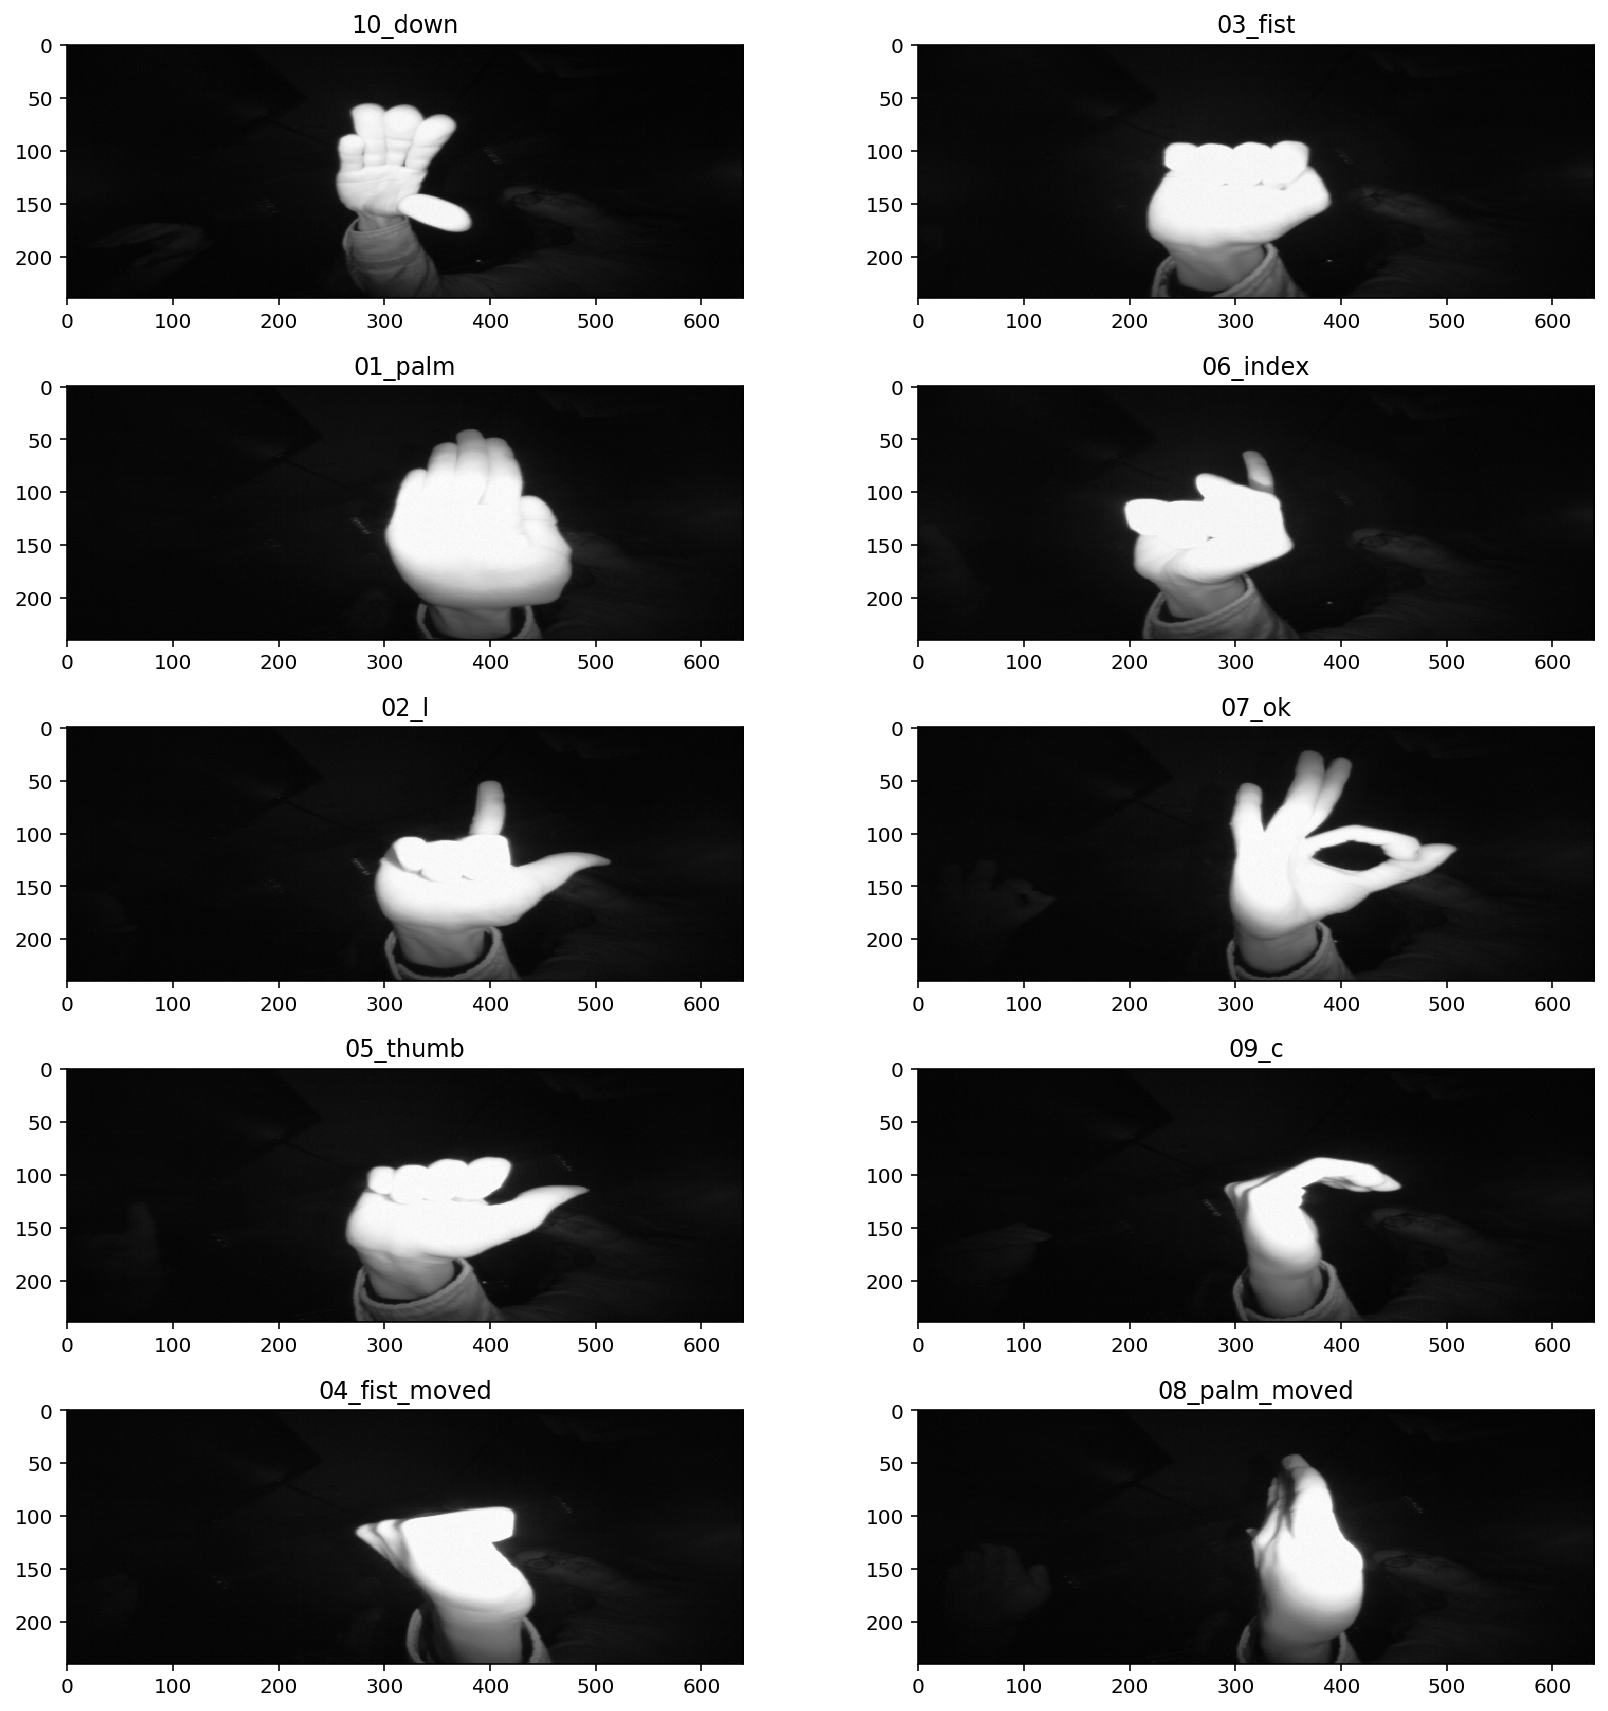

In [5]:
# show all original ten gestures
fig,ax=plt.subplots(5,2)
fig.set_size_inches(12,12)
sys_path = './leapGestRecog/00/'
for i, gesture in enumerate(os.listdir(sys_path)):
    img_title = os.listdir(sys_path + gesture)
    imagepath = os.path.join(sys_path + gesture + '/',img_title[0])
    image = cv2.imread(imagepath)
    ax[i%5,i//5].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i%5,i//5].set_title(gesture)
plt.tight_layout()

In [6]:
# x_data = []
# y_data = []
# IMG_SIZE = 224
# datacount = 0 # total count of images are in 
# for i in range(0, 10): # Loop over the ten top-level folders
#     for j in os.listdir('./leapGestRecog/0' + str(i) + '/'):
#         if not j.startswith('.'): # avoid hidden folders
#             count = 0 # Total images of a given gesture
#             for k in os.listdir('./leapGestRecog/0' + 
#                                 str(i) + '/' + j + '/'):
#                                 # Loop over the images
#                 path = './leapGestRecog/0' + str(i) + '/' + j + '/' + k
#                 img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
#                 img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
#                 arr = np.array(img)
#                 x_data.append(arr) 
#                 count = count + 1
#             y_values = np.full((count, 1), classes[j]) 
#             y_data.append(y_values)
#             datacount = datacount + count
# x_data = np.array(x_data, dtype = 'float32')
# y_data = np.array(y_data)

In [9]:
# np.save('x_data.npy', x_data)
# np.save('y_data.npy', y_data)

In [7]:
x_data = np.load('x_data.npy')
y_data = np.load('y_data.npy')

In [8]:
# x_data = np.squeeze(x_data)
x_data.shape

(20000, 224, 224)

In [9]:
y_data.shape

(100, 200, 1)

In [10]:
y_data = y_data.reshape(x_data.shape[0],)
y_data.shape

(20000,)

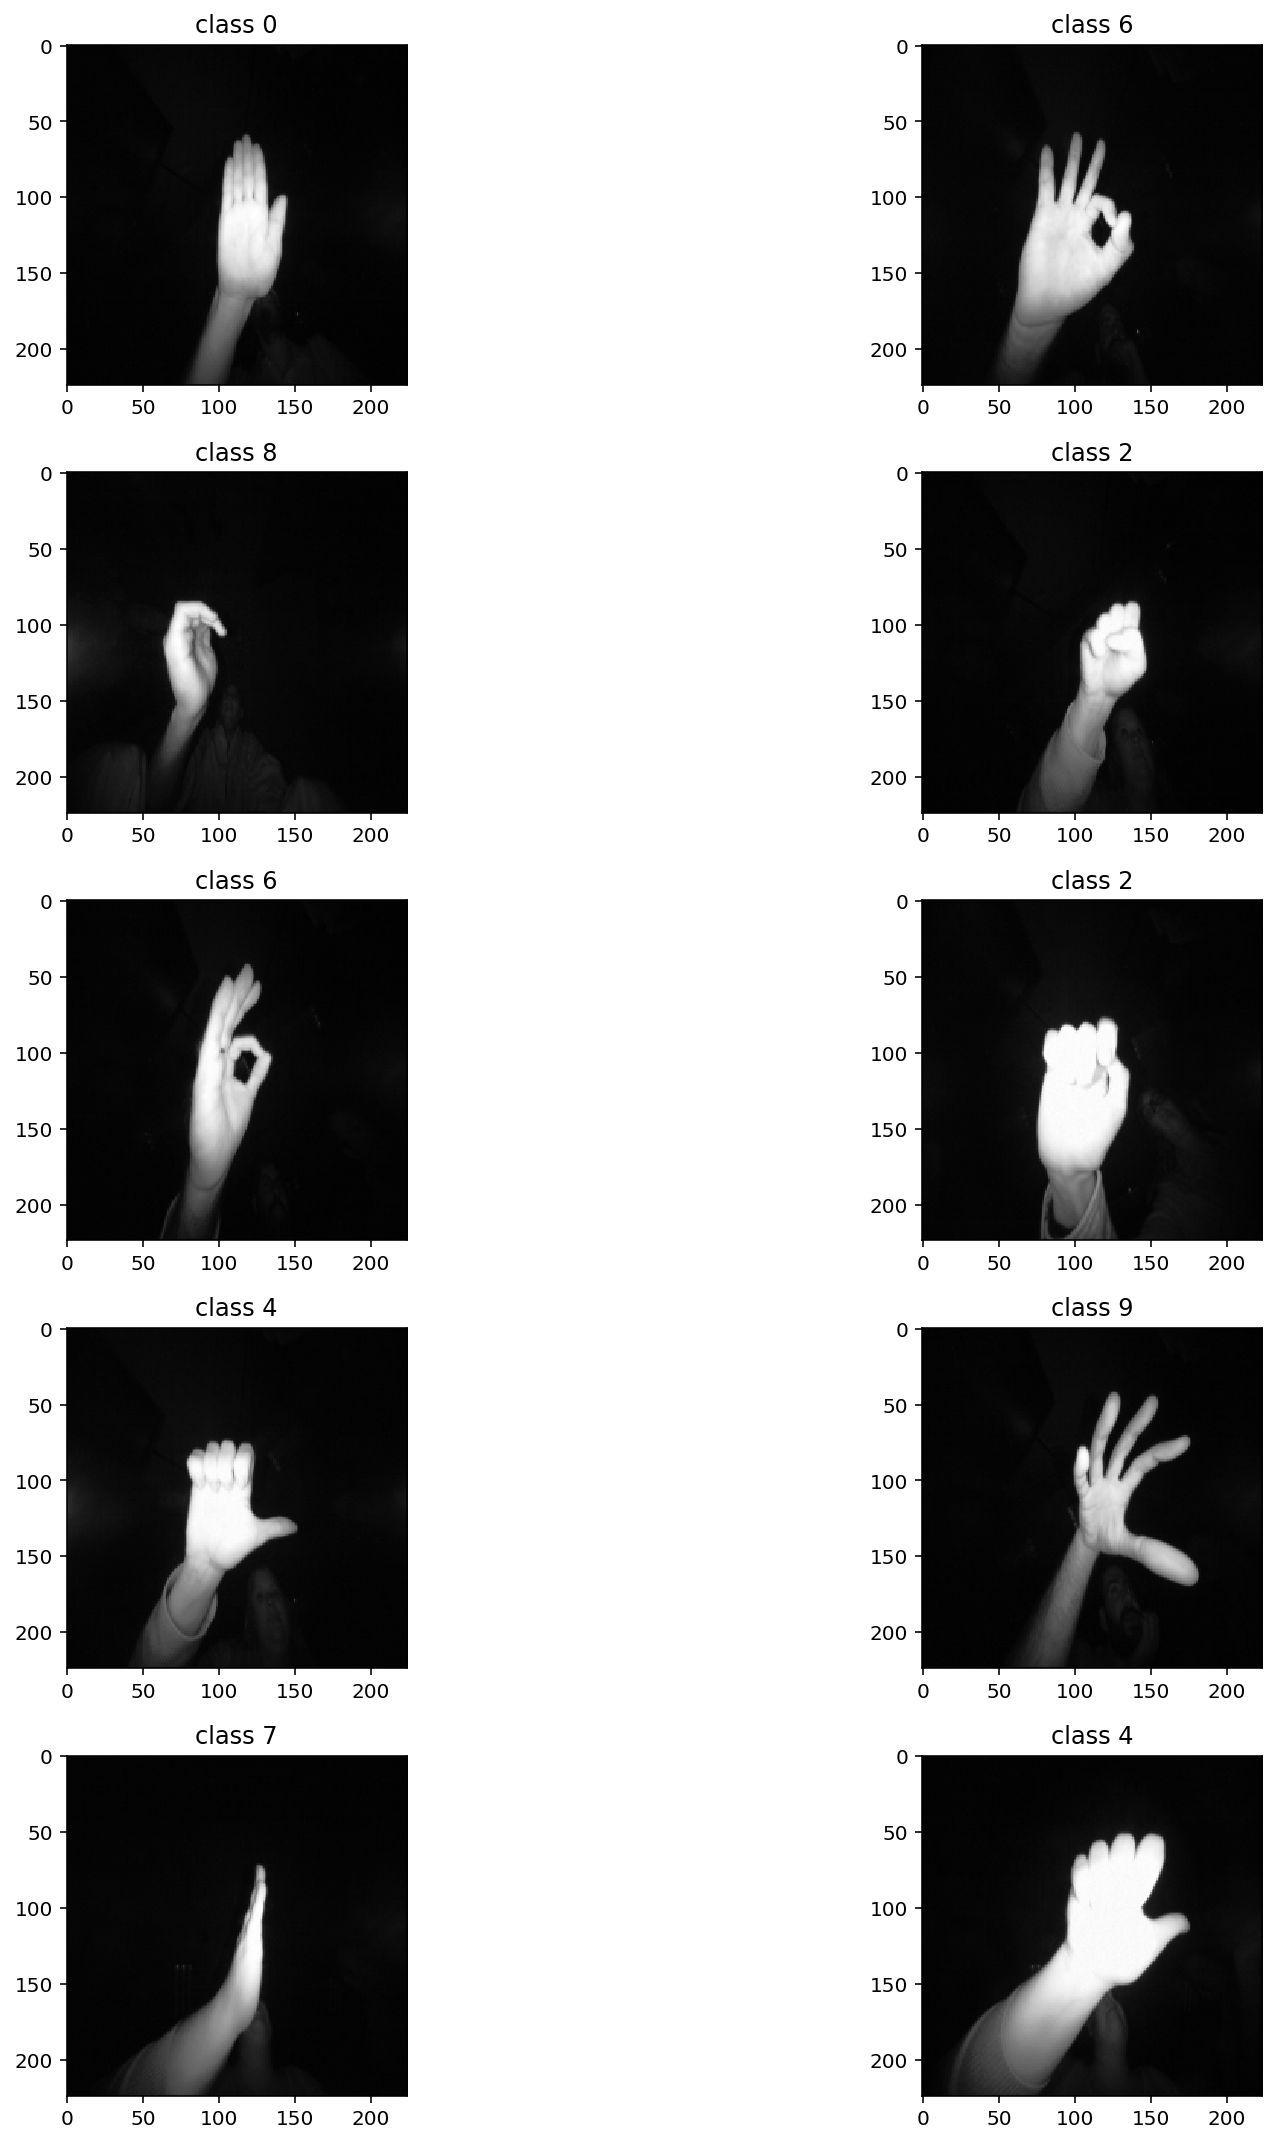

In [11]:
import random
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(y_data))
        ax[i,j].imshow(x_data[l],cmap='gray')
        ax[i,j].set_title('class '+ str(y_data[l]))
        
plt.tight_layout()

### 1.2 Random Data Augmentation

In [12]:
from keras.preprocessing.image import ImageDataGenerator
import random

Using TensorFlow backend.


In [13]:
aug = [ImageDataGenerator(rotation_range=random.randrange(180)),
       ImageDataGenerator(horizontal_flip=True),
       ImageDataGenerator(zoom_range=[0.5, 1.5]),
       ImageDataGenerator(width_shift_range=0.2)]

In [14]:
# randomly generate a new image for each image
new_img = []
new_label = []
x_data = x_data.reshape(*x_data.shape,1)
for i, img in enumerate(x_data):
    img = np.expand_dims(img, 0)
    datagen = aug[random.randrange(len(aug))] # ramdomly pick a transform
    it = datagen.flow(img, batch_size=1) # generator
    new = it.next()[0].astype('float32')
    new_img.append(new)
    new_label.append(y_data[i])
new_imgs = np.array(new_img)
new_labels = np.array(new_label)

In [15]:
new_imgs.shape

(20000, 224, 224, 1)

In [16]:
new_labels.shape

(20000,)

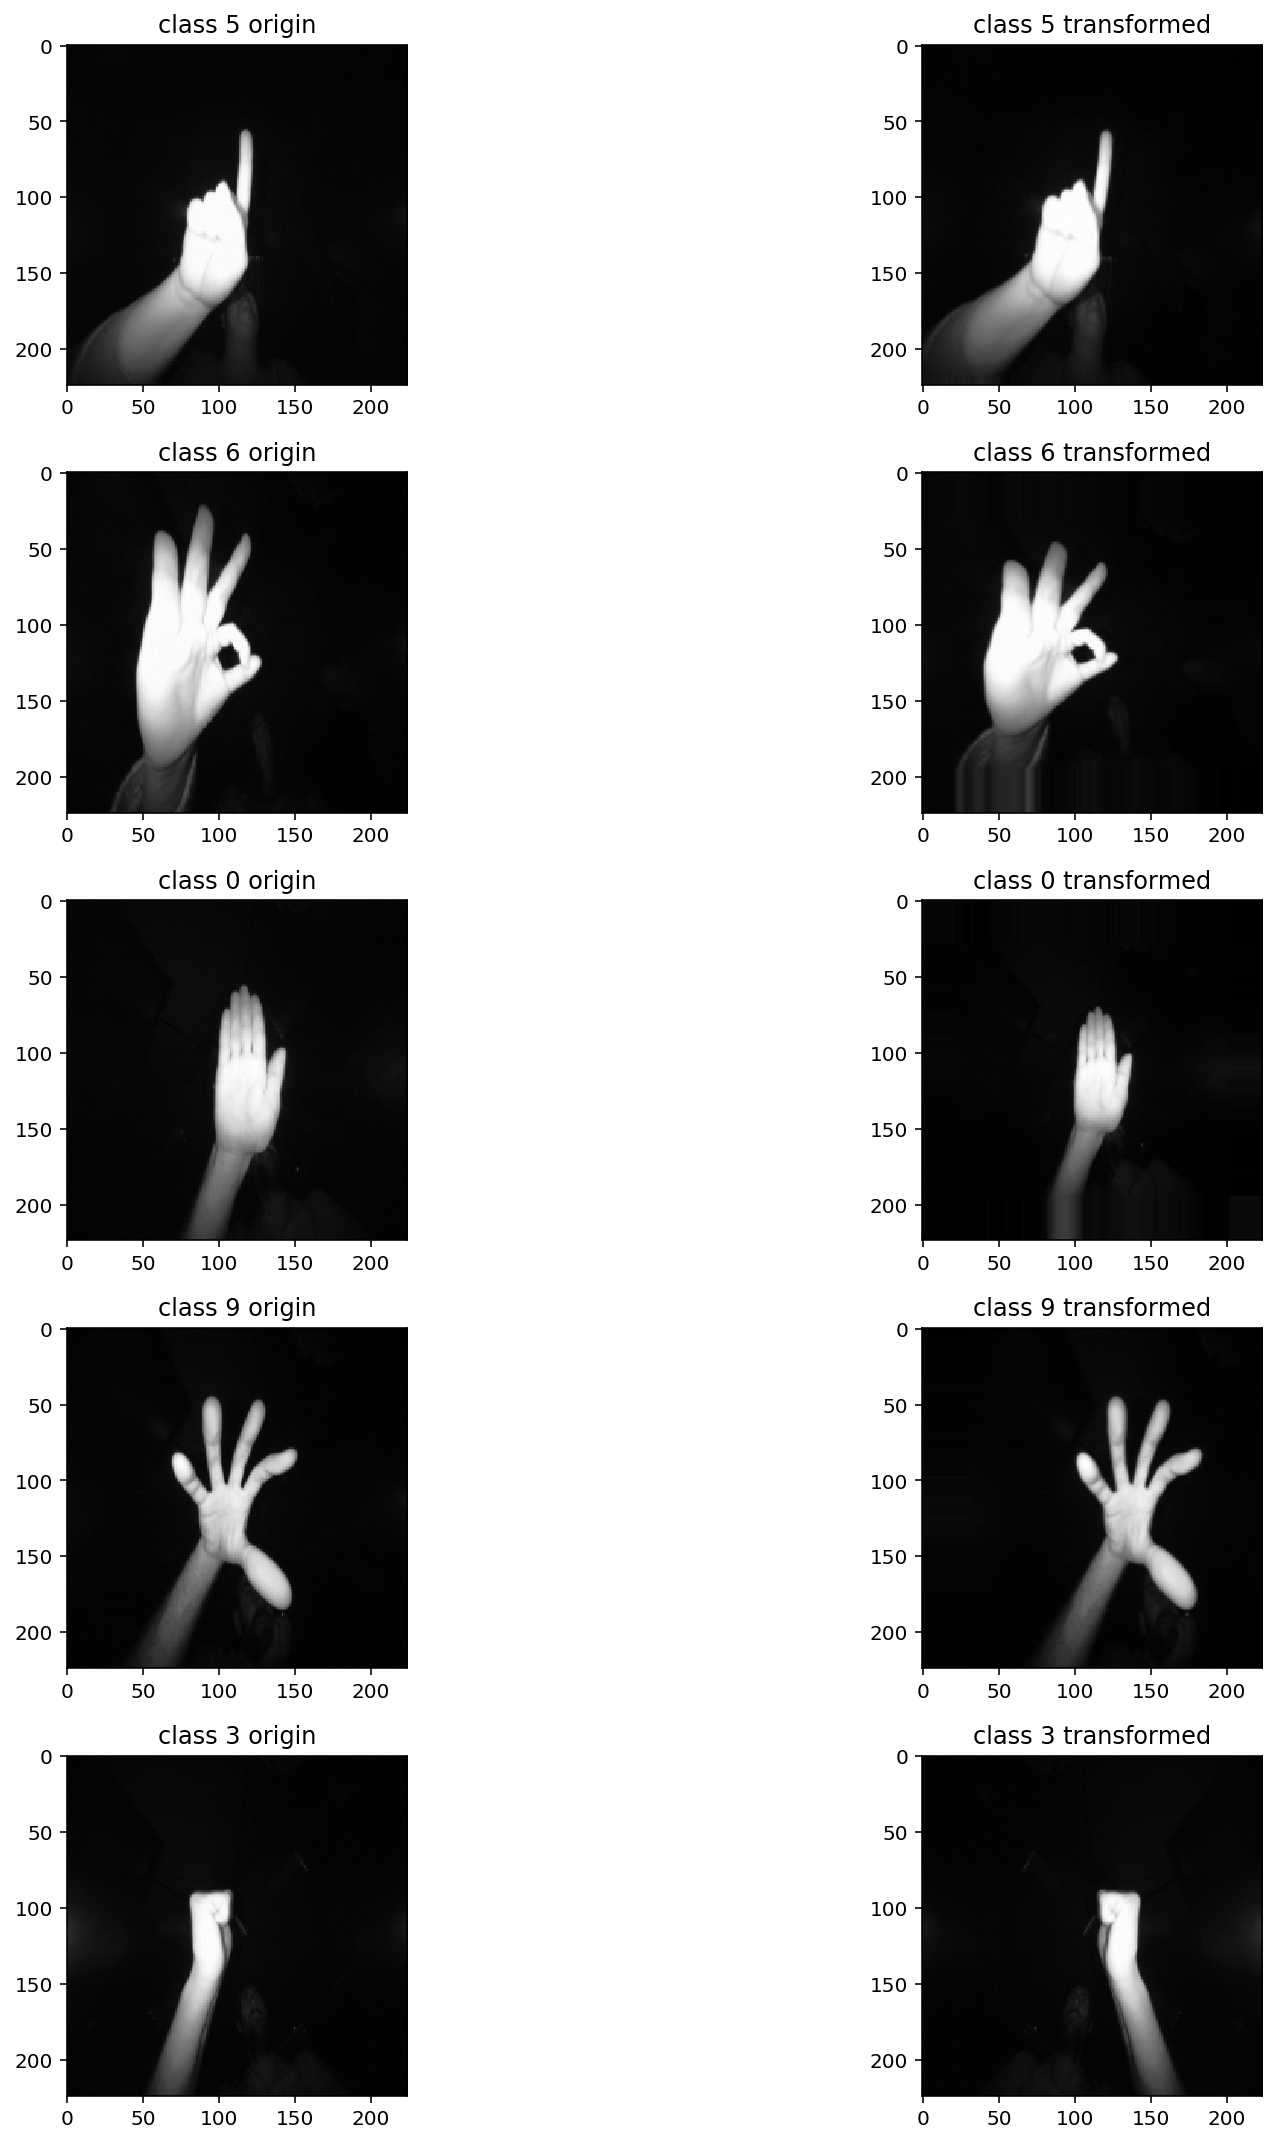

In [17]:
# Visualize several transformed images with its origin
x_data = np.squeeze(x_data)
new_imgs = np.squeeze(new_imgs)
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    l=random.randint(0,len(new_labels))
    ax[i,0].imshow(x_data[l],cmap='gray')
    ax[i,0].set_title('class '+ str(y_data[l]) + ' origin')
    ax[i,1].imshow(new_imgs[l],cmap='gray')
    ax[i,1].set_title('class '+ str(y_data[l]) + ' transformed')
plt.tight_layout()

In [18]:
x_total = np.concatenate((x_data, new_imgs), axis=0)
y_total = np.concatenate((y_data, new_labels), axis=0)

In [21]:
# np.save('x_total.npy', x_total)
# np.save('y_total.npy', y_total)

In [4]:
x_total = np.load('x_total.npy')
y_total = np.load('y_total.npy')

In [5]:
x_total.shape

(40000, 224, 224)

In [6]:
y_total.shape

(40000,)

### 1.3 Image Segmentation

In [17]:
cv2.imwrite('img.jpg', thresh)

True

In [23]:
segmented = []
for img in x_total:
    _, thresh = cv2.threshold(img.astype('uint8'),0,255, cv2.THRESH_OTSU)
    segmented.append(thresh)
x_seg = np.array(segmented)
np.save('x_seg.npy',x_seg)

In [24]:
x_seg = np.load('x_seg.npy')
x_seg.shape

(40000, 224, 224)

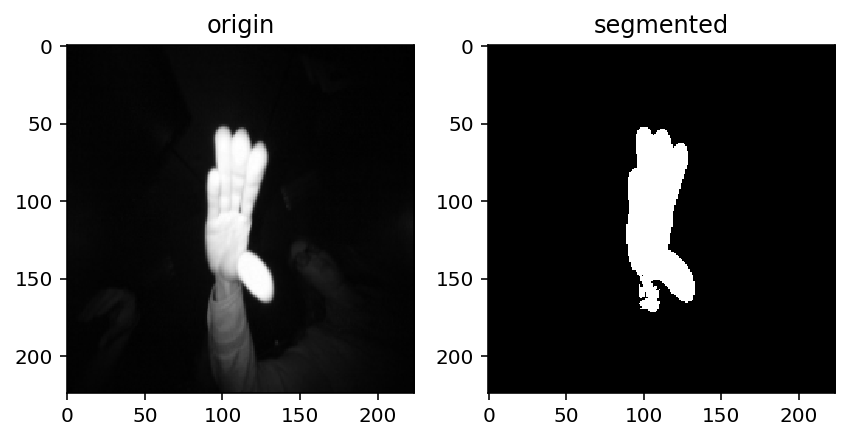

In [28]:
# Visualize several segmented images with its origin
fig,ax=plt.subplots(1,2)
# fig.set_size_inches(15,15)

ax[0].imshow(x_total[20000],cmap='gray')
ax[0].set_title('origin')
ax[1].imshow(x_seg[20000],cmap='gray')
ax[1].set_title('segmented')
plt.tight_layout()

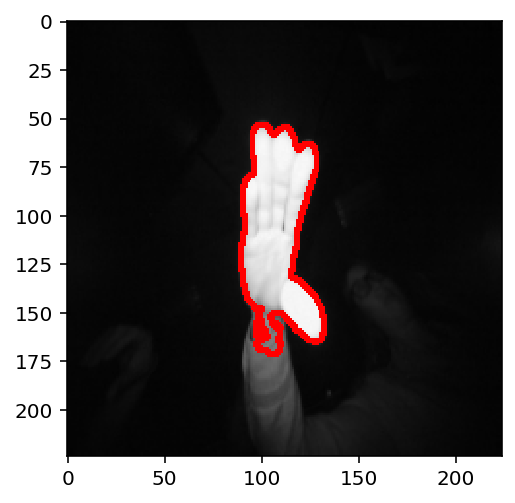

In [13]:
# See an example
ret, thresh = cv2.threshold(x_total[20000].astype('uint8'),0,255, cv2.THRESH_OTSU)
# get the contours in the thresholded image
(_, contours,_) = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img = cv2.cvtColor(x_total[20000], cv2.COLOR_GRAY2BGR)
seg=cv2.drawContours(img.astype(np.uint8), contours, -1, (255,0,0), 2)
plt.imshow(seg)

### Normalize and shuffle